In [2]:
pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


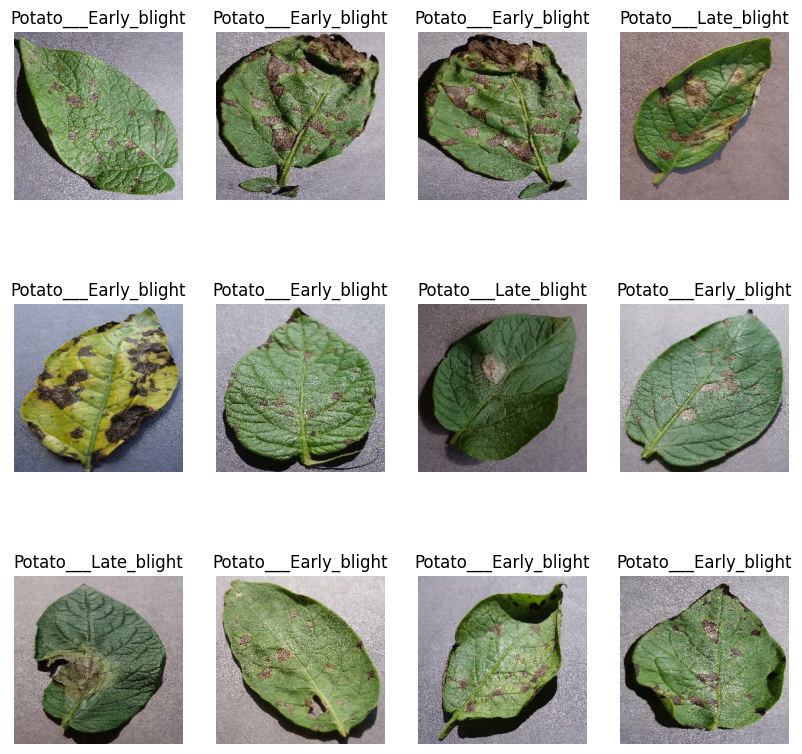

In [8]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
80% ==> Training
20%==> test
      10%==> Validation
      10%==> Test

In [9]:
len(dataset)

68

In [ ]:
68*32

In [10]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [11]:
train_ds = dataset.take(54)
len(train_ds)

54

In [12]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [13]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [14]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [15]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [16]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [17]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [18]:
len(train_ds)

54

In [19]:
len(val_ds)

6

In [20]:
len(test_ds)

8

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[161. 146. 151.]
  [147. 132. 137.]
  [143. 128. 133.]
  ...
  [162. 142. 151.]
  [163. 143. 152.]
  [164. 144. 153.]]

 [[146. 131. 136.]
  [147. 132. 137.]
  [145. 130. 135.]
  ...
  [163. 143. 152.]
  [164. 144. 153.]
  [165. 145. 154.]]

 [[145. 130. 135.]
  [147. 132. 137.]
  [147. 132. 137.]
  ...
  [162. 142. 151.]
  [163. 143. 152.]
  [163. 143. 152.]]

 ...

 [[180. 166. 166.]
  [182. 168. 168.]
  [182. 168. 168.]
  ...
  [174. 159. 164.]
  [171. 156. 161.]
  [169. 154. 159.]]

 [[173. 159. 159.]
  [180. 166. 166.]
  [183. 169. 169.]
  ...
  [177. 162. 167.]
  [173. 158. 163.]
  [170. 155. 160.]]

 [[160. 146. 146.]
  [172. 158. 158.]
  [179. 165. 165.]
  ...
  [178. 163. 168.]
  [175. 160. 165.]
  [172. 157. 162.]]]


In [23]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.63529414 0.6509804  0.69411767]
  [0.6509804  0.6666667  0.70980394]
  [0.69411767 0.70980394 0.7529412 ]
  ...
  [0.64705884 0.6392157  0.6901961 ]
  [0.627451   0.61960787 0.67058825]
  [0.63529414 0.627451   0.6784314 ]]

 [[0.8117647  0.827451   0.87058824]
  [0.6862745  0.7019608  0.74509805]
  [0.5529412  0.5686275  0.6117647 ]
  ...
  [0.6156863  0.60784316 0.65882355]
  [0.6        0.5921569  0.6431373 ]
  [0.6117647  0.6039216  0.654902  ]]

 [[0.7294118  0.74509805 0.7882353 ]
  [0.7137255  0.7294118  0.77254903]
  [0.7647059  0.78039217 0.8235294 ]
  ...
  [0.6156863  0.60784316 0.65882355]
  [0.6        0.5921569  0.6431373 ]
  [0.6039216  0.59607846 0.64705884]]

 ...

 [[0.60784316 0.6        0.6509804 ]
  [0.6        0.5921569  0.6431373 ]
  [0.6156863  0.60784316 0.65882355]
  ...
  [0.5568628  0.54509807 0.5882353 ]
  [0.5568628  0.54509807 0.5882353 ]
  [0.49803922 0.4862745  0.5294118 ]]

 [[0.7254902  0.7176471  0.76862746]
  [0.6784314  0.67058825 0.72156864]


In [24]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

In [25]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])


In [26]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [27]:
from tensorflow.keras import models, layers

IMAGE_SIZE = 256
CHANNELS = 3
n_classes = 3


input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)


model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),  
    resize_and_rescale,  
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


model.summary()


E:\Zupter\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [30]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 178s 3s/step - accuracy: 0.4736 - loss: 0.9385 - val_accuracy: 0.7292 - val_loss: 0.8121
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.7074 - loss: 0.6964 - val_accuracy: 0.7656 - val_loss: 0.5500
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.7977 - loss: 0.4658 - val_accuracy: 0.8594 - val_loss: 0.2980
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - accuracy: 0.8646 - loss: 0.3330 - val_accuracy: 0.9375 - val_loss: 0.1740
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 172s 3s/step - accuracy: 0.8980 - loss: 0.2664 - val_accuracy: 0.9271 - val_loss: 0.2309
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 158s 3s/step - accuracy: 0.8949 - loss: 0.2457 - val_accuracy: 0.9479 - val_loss: 0.1027
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.9289 - loss: 0.1597 - val_accuracy: 0.9583 - val_loss: 0.1520
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 301s 6s/step - accuracy: 0.9197 - loss: 0.2024 - val_accuracy: 0.9219 - v

In [31]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 713ms/step - accuracy: 0.9936 - loss: 0.0654


In [32]:
scores

[0.05195315182209015, 0.99609375]

In [33]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [34]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [35]:
type(history.history['loss'])

list

In [36]:
history.history['loss']

[0.8950644135475159,
 0.6331647038459778,
 0.3931856155395508,
 0.3498014509677887,
 0.28050684928894043,
 0.20558223128318787,
 0.17604713141918182,
 0.1840096265077591,
 0.13828176259994507,
 0.11226721853017807,
 0.15996743738651276,
 0.11113101243972778,
 0.10150469839572906,
 0.11399462819099426,
 0.09511493891477585,
 0.0975123792886734,
 0.07134674489498138,
 0.0954604223370552,
 0.05837499350309372,
 0.09133382141590118,
 0.07312162965536118,
 0.05278582498431206,
 0.05727574601769447,
 0.05061115324497223,
 0.05083644762635231,
 0.03186381608247757,
 0.09119633585214615,
 0.031394585967063904,
 0.0981956496834755,
 0.05963476374745369,
 0.032043348997831345,
 0.08705960214138031,
 0.04810361936688423,
 0.03796389698982239,
 0.06416148692369461,
 0.028930364176630974,
 0.03617706522345543,
 0.040219083428382874,
 0.0455339252948761,
 0.03611110895872116,
 0.02236516773700714,
 0.025411801412701607,
 0.035732951015233994,
 0.05158298835158348,
 0.026346158236265182,
 0.032737806

In [37]:
len(history.history['loss'])

50

In [38]:
history.history['loss'][:5]

[0.8950644135475159,
 0.6331647038459778,
 0.3931856155395508,
 0.3498014509677887,
 0.28050684928894043]

In [39]:
history.history['accuracy']

[0.5162037014961243,
 0.7170138955116272,
 0.8327546119689941,
 0.8605324029922485,
 0.8871527910232544,
 0.9120370149612427,
 0.9299768805503845,
 0.9247685074806213,
 0.9427083134651184,
 0.9589120149612427,
 0.9380787014961243,
 0.9623842835426331,
 0.9606481194496155,
 0.9594907164573669,
 0.9635416865348816,
 0.9618055820465088,
 0.9728009104728699,
 0.9646990895271301,
 0.9751157164573669,
 0.9675925970077515,
 0.9739583134651184,
 0.9849537014961243,
 0.984375,
 0.9814814925193787,
 0.9826388955116272,
 0.9913194179534912,
 0.9646990895271301,
 0.9907407164573669,
 0.9618055820465088,
 0.9768518805503845,
 0.9918981194496155,
 0.9745370149612427,
 0.9820601940155029,
 0.9884259104728699,
 0.9780092835426331,
 0.9901620149612427,
 0.9878472089767456,
 0.9878472089767456,
 0.9861111044883728,
 0.9890046119689941,
 0.9918981194496155,
 0.9901620149612427,
 0.9884259104728699,
 0.9785879850387573,
 0.9913194179534912,
 0.9861111044883728,
 0.9832175970077515,
 0.9895833134651184,
 0

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

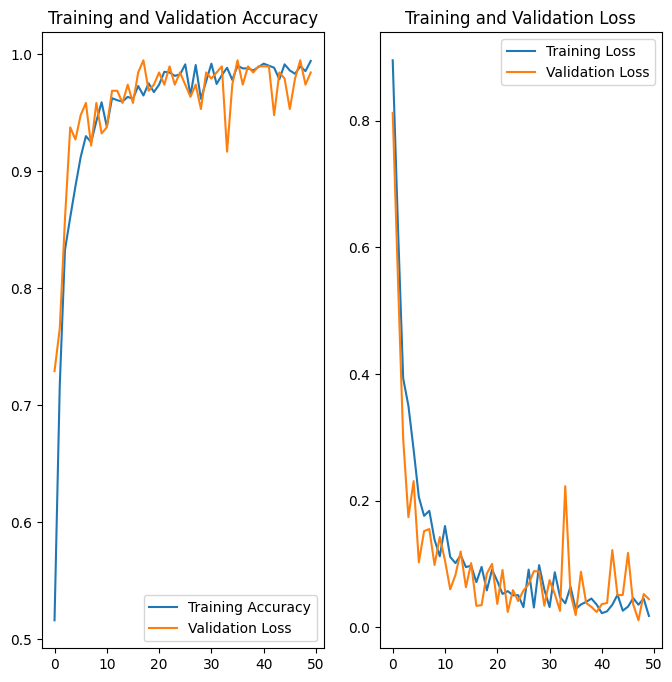

In [41]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Loss')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
predicted label: Potato___Early_blight


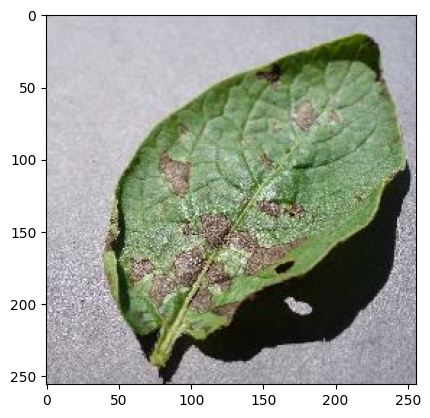

In [60]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:", class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [43]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


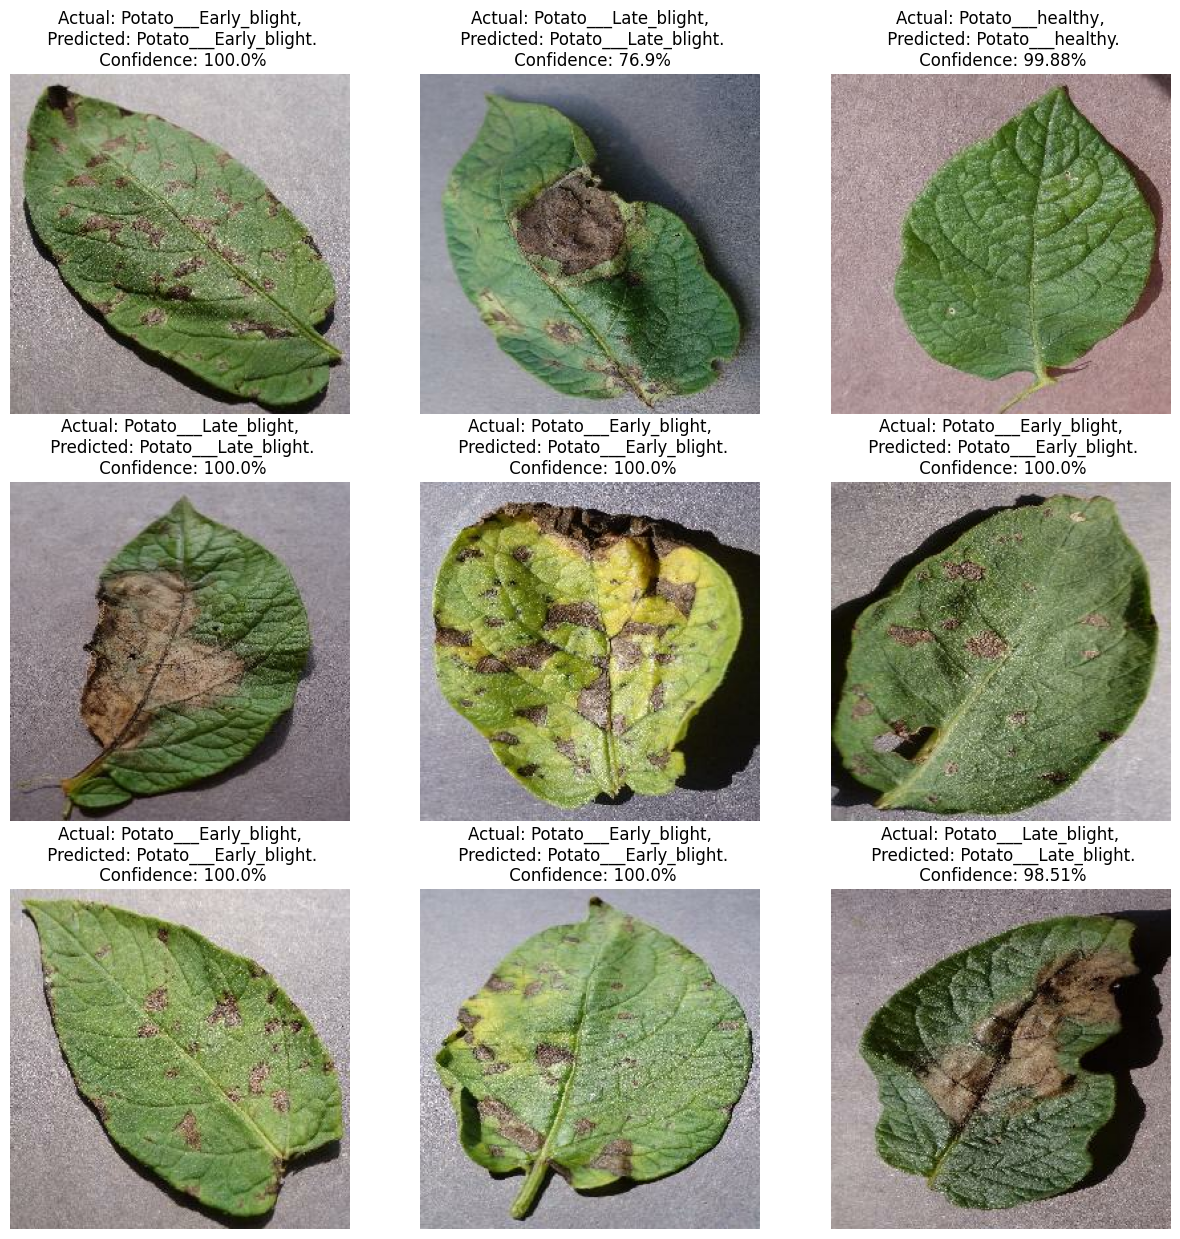

In [44]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [47]:
pip install h5py

In [48]:
model.save('model.h5')

In [49]:
# Recommended way to save the model in the native Keras format
model.save('model.keras')


In [50]:
loaded_model = tf.keras.models.load_model('model.keras')


E:\Zupter\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [51]:
loaded_model = tf.keras.models.load_model('model.keras')
loaded_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [53]:
# Saving only weights with .weights.h5 extension
model.save_weights('model_weights.weights.h5')



In [61]:
loaded_model = tf.keras.models.load_model('model.keras')  # Load the model architecture first
loaded_model.load_weights('model_weights.weights.h5')     # Then load the weights
